In [1]:
from NeuralNetwork2 import ANN2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import joblib

In [2]:
adversial_images = []

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
# train_data = train_data.sample(n=600,random_state=1)
# test_data = test_data.sample(n=100,random_state=1)

In [4]:
X_train = train_data.iloc[:,1:].values / 255
y_train = train_data.iloc[:,0].values.reshape(X_train.shape[0],1)
X_test = test_data.iloc[:,1:].values / 255
y_test = test_data.iloc[:,0].values.reshape(X_test.shape[0],1)

In [5]:
lr = np.arange(10)
one_hot = []
for label in y_train.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_train = one_hot
one_hot = []
for label in y_test.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_test = one_hot

In [6]:
model = joblib.load('Trained1Network.model')

In [7]:
# sample = 80
# sample = 25
# sample = 30 ## Best one
# sample = 45 ## Best one
# sample = 11 ## Best one

Target 8
Target [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


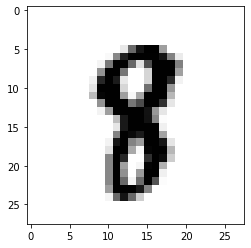

In [8]:
sample = 63
y_pred = model.predict(X_test[sample].reshape(1,784)).ravel()
print("Target {}".format(np.argmax(y_pred)))
print("Target {}".format(y_test[sample]))
plt.imshow(X_test[sample].reshape(28,28),cmap='gray_r')
plt.show()

In [9]:
def get_target_sample(i):
    return (X_test[i].ravel(), y_test[i], y_test[i+1] )
X_target, y_pred, y_goal = get_target_sample(sample)

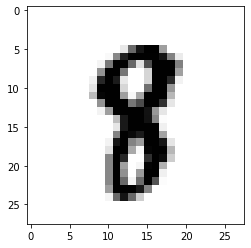

Predicted : 8
Adversial Goal : 7
Predicted : [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Adversial Goal : [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [10]:
plt.imshow(X_target.reshape(28,28),cmap='gray_r')
plt.show()
print('Predicted : {}'.format(np.argmax(y_pred)))
print('Adversial Goal : {}'.format(np.argmax(y_goal)))
print('Predicted : {}'.format(y_pred))
print('Adversial Goal : {}'.format(y_goal))

In [11]:
def generate_image(X_target, y_goal, learning_rate=0.1, _lambda=0.8):
    adversial_image = model.get_adversial_image(X_target=X_target,
                                                y_goal=y_goal,
                                                seed=2,
                                                learning_rate=0.1,
                                                _lambda=0.8,
                                                epochs=1000,
                                                print_results=False)
    return adversial_image
adversial_image = generate_image(X_target, y_goal)

In [12]:
print('Last Epoch Error : ', model.adversial_loss[-1])

Last Epoch Error :  [2.31512737]


Adversial Prediction 8
Actual Prediction [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


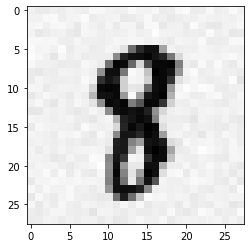

In [13]:
y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()
print("Adversial Prediction {}".format(np.argmax(y_pred_adversial)))
print("Actual Prediction {}".format(y_test[sample]))
plt.imshow(adversial_image.reshape(28,28),cmap='gray_r')
plt.show()

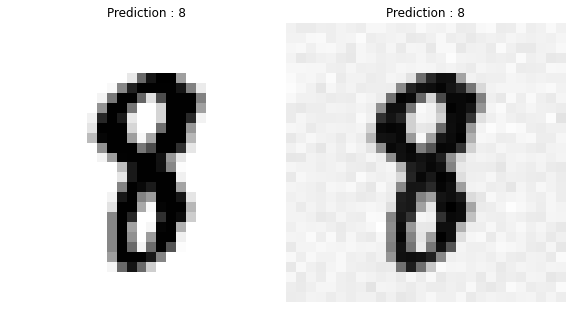

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
fig.subplots_adjust(wspace=.00)
# figsize=(10,3)
ax1.imshow(X_target.reshape(28,28),cmap='gray_r')
ax1.set_title('Prediction : {}'.format(np.argmax(y_test[sample])))
ax1.set_axis_off()
ax2.imshow(adversial_image.reshape(28,28),cmap='gray_r')
ax2.set_title('Prediction : {}'.format(np.argmax(y_pred_adversial)))
ax2.set_axis_off()
fig.show()

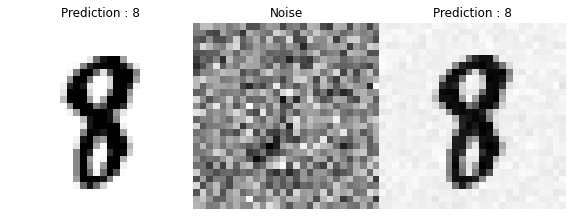

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10,10))
fig.subplots_adjust(wspace=.00)
# figsize=(10,3)
ax1.imshow(X_target.reshape(28,28),cmap='gray_r')
ax1.set_title('Prediction : {}'.format(np.argmax(y_test[sample])))
ax1.set_axis_off()

ax2.imshow((X_target - adversial_image).reshape(28,28),cmap='gray_r')
ax2.set_title('Noise')
ax2.set_axis_off()

ax3.imshow(adversial_image.reshape(28,28),cmap='gray_r')
ax3.set_title('Prediction : {}'.format(np.argmax(y_pred_adversial)))
ax3.set_axis_off()
fig.show()

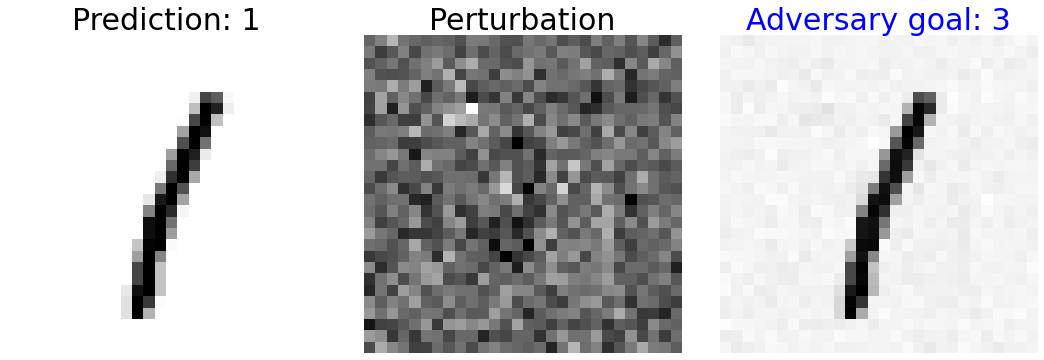

In [16]:
num_images = 1
successful_attacks = [11, 45, 2, 95, 47, 7]

fig = plt.figure(figsize=(15,num_images*5))
axs = fig.subplots(num_images,3)
fig.subplots_adjust(top=0.2)
fig.tight_layout()
axs = axs.ravel()
for i in range(0,num_images):
    sample_i = successful_attacks[i]
    X_target, y_pred, y_goal = get_target_sample(sample_i)
    # adversial_image = X_target
    adversial_image = generate_image(X_target, y_goal)
    y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()

    axs[i*3].imshow(X_target.reshape(28,28),cmap='gray_r')
    axs[i*3].set_title('Prediction: {}'.format(np.argmax(y_pred)), fontsize=30)
    axs[i*3].set_axis_off()

    axs[i*3+1].imshow((X_target - adversial_image).reshape(28,28),cmap='gray_r')
    axs[i*3+1].set_title('Perturbation', fontsize=30)
    axs[i*3+1].set_axis_off()

    axs[i*3+2].imshow(adversial_image.reshape(28,28),cmap='gray_r')
    temp = [0]*10
    temp[np.argmax(y_pred_adversial)] = 1
    if temp == y_goal:
        axs[i*3+2].set_title('Adversary goal: {}'.format(np.argmax(y_goal)), color='blue', fontsize=30)
    else:
        axs[i*3+2].set_title('Adversary goal: {}'.format(np.argmax(y_goal)), color='red', fontsize=30)
    axs[i*3+2].set_axis_off()
# fig.tight_layout(pad=3.0)
plt.savefig('images/generated_adversarial_images.jpg',bbox_inches='tight',dpi=400)

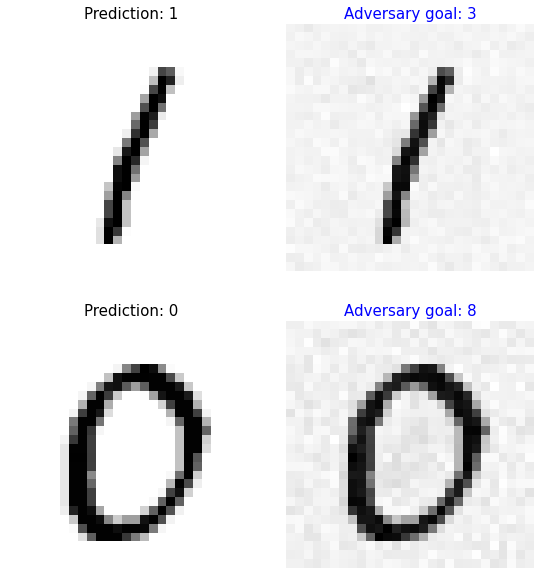

In [52]:
num_images = 2
successful_attacks = [11, 45, 2, 95, 47, 7]

fig = plt.figure(figsize=(10,num_images*5))
axs = fig.subplots(num_images,2)
fig.subplots_adjust(wspace=0.001)
# fig.tight_layout()
axs = axs.ravel()
for i in range(0,num_images):
    sample_i = successful_attacks[i]
    X_target, y_pred, y_goal = get_target_sample(sample_i)
    # adversial_image = X_target
    adversial_image = generate_image(X_target, y_goal)
    y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()

    axs[i*2].imshow(X_target.reshape(28,28),cmap='gray_r')
    axs[i*2].set_title('Prediction: {}'.format(np.argmax(y_pred)), fontsize=15)
    axs[i*2].set_axis_off()

    axs[i*2+1].imshow(adversial_image.reshape(28,28),cmap='gray_r')
    temp = [0]*10
    temp[np.argmax(y_pred_adversial)] = 1
    if temp == y_goal:
        axs[i*2+1].set_title('Adversary goal: {}'.format(np.argmax(y_goal)), color='blue', fontsize=15)
    else:
        axs[i*2+1].set_title('Adversary goal: {}'.format(np.argmax(y_goal)), color='red', fontsize=15)
    axs[i*2+1].set_axis_off()
# fig.tight_layout(pad=3.0)
plt.savefig('images/generated_adversarial_images.jpg',bbox_inches='tight',dpi=400)

In [16]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

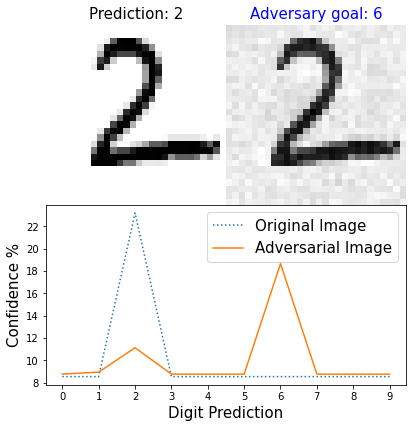

In [38]:
num_images = 1
successful_attacks = [11, 45, 2, 95, 47, 7]
successful_attacks = [2]

fig = plt.figure(figsize=(5,num_images*5))
for i in range(num_images):
    sample_i = successful_attacks[i]
    X_target, y_pred, y_goal = get_target_sample(sample_i)
    # adversial_image = X_target
    adversial_image = generate_image(X_target, y_goal)
    y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()

    axes_width = 0.5/num_images
    ax_1 = fig.add_axes([0, axes_width*(2*i+1), 0.5, axes_width])
    ax_1.imshow(X_target.reshape(28,28),cmap='gray_r')
    ax_1.set_title('Prediction: {}'.format(np.argmax(y_pred)), fontsize=15)
    ax_1.set_axis_off()

    ax_2 = fig.add_axes([0.5, axes_width*(2*i+1), 0.5, axes_width])
    ax_2.imshow(adversial_image.reshape(28,28),cmap='gray_r')
    temp = [0]*10
    temp[np.argmax(y_pred_adversial)] = 1
    if temp == y_goal:
        ax_2.set_title('Adversary goal: {}'.format(np.argmax(y_goal)), color='blue', fontsize=15)
    else:
        ax_2.set_title('Adversary goal: {}'.format(np.argmax(y_goal)), color='red', fontsize=15)
    ax_2.set_axis_off()

    ax_2 = fig.add_axes([0, (i/num_images), 1, axes_width])
    ax_2.plot(np.arange(10),softmax(y_pred)*100,':',label='Original Image')
    ax_2.plot(np.arange(10),softmax(y_pred_adversial)*100,'-',label='Adversarial Image')
    ax_2.legend(fontsize=15)
    ax_2.set_xticks([0,1,2,3,4,5,6,7,8,9])
    ax_2.set_xlabel('Digit Prediction', fontsize=15)
    ax_2.set_ylabel('Confidence %', fontsize=15)

plt.savefig('images/generated_adversarial_image_3.jpg',bbox_inches='tight',dpi=900)

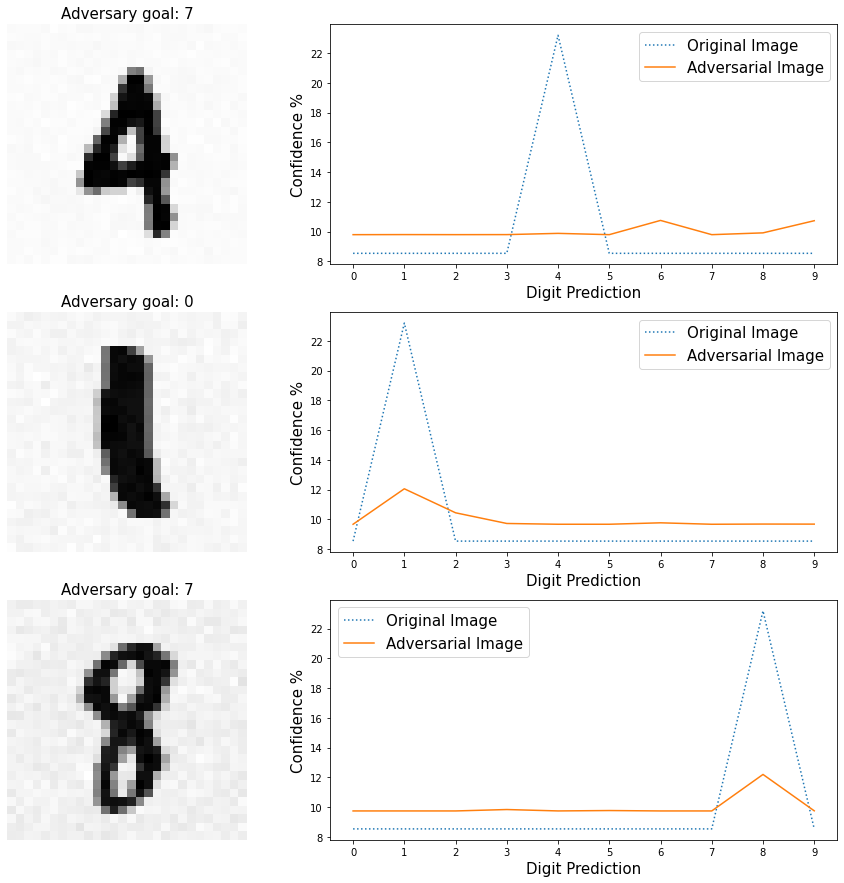

In [36]:
num_images = 3
unsuccesful_attacks = [7, 87, 63, 16]

fig = plt.figure(figsize=(15,num_images*5))
axs = fig.subplots(num_images,2, gridspec_kw={'width_ratios': [1, 2]})
# fig.tight_layout()
axs = axs.ravel()
for i in range(0,num_images):
    sample_i = unsuccesful_attacks[i]
    X_target, y_pred, y_goal = get_target_sample(sample_i)
    # adversial_image = X_target
    adversial_image = generate_image(X_target, y_goal)
    y_pred_adversial = model.predict(adversial_image.reshape(1,784)).ravel()

    axs[i*2].imshow(adversial_image.reshape(28,28),cmap='gray_r')
    axs[i*2].set_title('Adversary goal: {}'.format(np.argmax(y_goal)), fontsize=15)
    axs[i*2].set_axis_off()

    axs[i*2+1].plot(np.arange(10),softmax(y_pred)*100,':',label='Original Image')
    axs[i*2+1].plot(np.arange(10),softmax(y_pred_adversial)*100,'-',label='Adversarial Image')
    axs[i*2+1].legend(fontsize=15)
    axs[i*2+1].set_xticks([0,1,2,3,4,5,6,7,8,9])
    axs[i*2+1].set_xlabel('Digit Prediction', fontsize=15)
    axs[i*2+1].set_ylabel('Confidence %', fontsize=15)
plt.savefig('images/generated_adversarial_images_unsuccessful.jpg',bbox_inches='tight',dpi=400)

In [19]:
width=0.5
plt.bar(np.array(range(y_pred.shape[0])) - width/2,y_pred, width=width,label='Actual Prediction')
plt.bar(np.array(range(y_pred_adversial.shape[0])) + width/2,y_pred_adversial, width=width,label='Adversial Prediction')
plt.show()

AttributeError: 'list' object has no attribute 'shape'

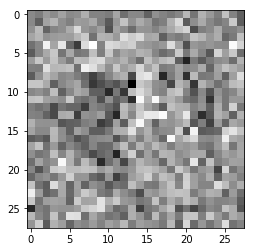

In [18]:
plt.imshow((adversial_image-X_target).reshape(28,28),cmap='gray')
plt.show()

In [21]:
adversial_images[1]

array([-7.77562253e-03, -1.77955348e-02,  5.98165523e-03, -6.14363141e-03,
        1.34485219e-02, -6.59610478e-03, -3.60129743e-03,  2.48271630e-02,
       -1.16119463e-02, -1.16827944e-02, -1.87642556e-02,  1.63031681e-02,
       -2.91652775e-02, -8.30382903e-03, -9.50964421e-03, -4.12572862e-02,
       -1.48674682e-03, -1.28338901e-02, -2.13209392e-02, -1.01953809e-02,
        3.18871416e-02, -2.39887829e-02,  2.72576586e-02,  5.99976515e-03,
       -1.65666079e-02,  3.98124966e-02, -1.31521625e-02, -4.28781866e-02,
       -8.36098180e-03, -4.29245763e-02,  1.37816735e-02,  2.80144718e-02,
       -2.79448501e-03, -1.50698074e-02,  8.55873689e-03,  5.61887293e-03,
        1.83181744e-02, -1.49775539e-02, -4.80877048e-02,  5.00187896e-03,
        4.22676399e-02, -9.94743038e-04,  2.10413524e-02,  5.22824438e-03,
       -2.55977136e-02, -1.58793099e-02,  2.59966721e-02,  5.95812902e-02,
       -4.65408672e-02, -3.11858891e-03,  1.99357167e-02, -8.66408755e-03,
       -2.23566098e-02, -